In [58]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

In [68]:
import pandas as pd

df = pd.read_csv('../../data/datasets/SIVIC_ARIMA.csv')

df['data'] = pd.to_datetime(df['any'].astype(str) + '-' + df['setmana_epidemiologica'].astype(str) + '-1', format='%Y-%U-%w')

df.drop(['any', 'setmana_epidemiologica'], axis=1, inplace=True)

df.set_index('data', inplace=True)

df = df['casos']

df = df.sort_index()

df.head()

data
2011-10-03    36016
2011-10-10    30361
2011-10-17    32156
2011-10-24    31242
2011-10-31    25942
Name: casos, dtype: int64

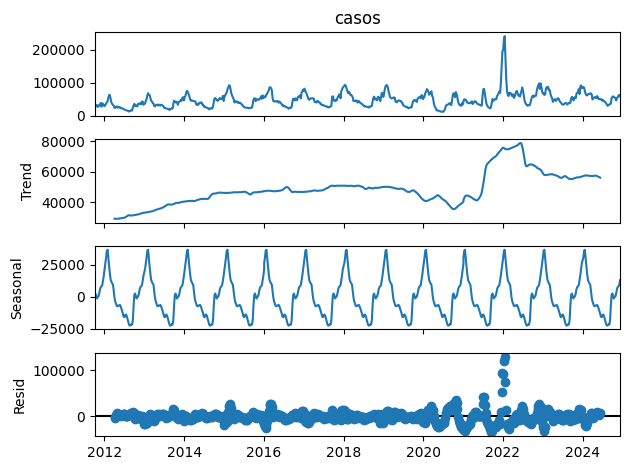

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive', period=52)  # Asumiendo periodicidad anual (52 semanas)
result.plot()
plt.show()

In [70]:
result = adfuller(df)
print("ADF Statistic: ", result[0])
print("p-value: ", result[1])

ADF Statistic:  -5.897740341534307
p-value:  2.825182091484711e-07


No cal diferenciar. Tenim p-valor no significatiu

<Figure size 1200x600 with 0 Axes>

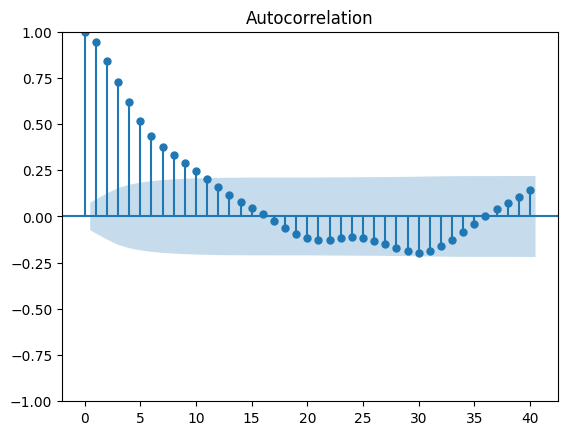

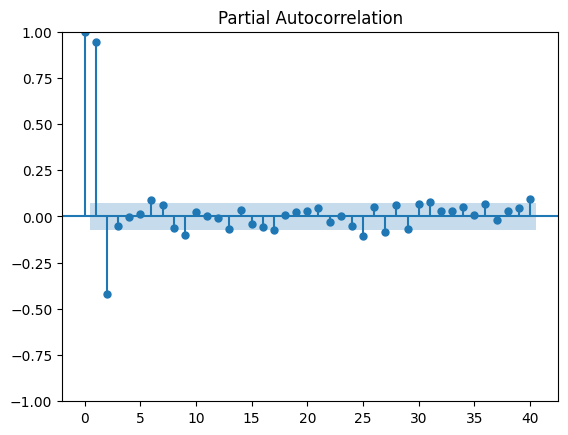

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df, lags=40)
plot_pacf(df, lags=40)
plt.show()

Infinits retards no nuls a l'ACF. Possible model segons PACF: 
- AR(3).

In [ ]:
# (p, d, q)
model = ARIMA(df, order=(3, 0, 0))
fitted_model = model.fit()

print(fitted_model.summary())

forecast_steps=12

#forecast = fitted_model.forecast(steps=forecast_steps)
#forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

#print("Predicción:", forecast)

c:\Users\laiam\OneDrive\Documentos\bitsxmarato\bits\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\laiam\OneDrive\Documentos\bitsxmarato\bits\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\laiam\OneDrive\Documentos\bitsxmarato\bits\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  casos   No. Observations:                  688
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7067.114
Date:                Sun, 15 Dec 2024   AIC                          14144.229
Time:                        11:42:19   BIC                          14166.898
Sample:                             0   HQIC                         14152.998
                                - 688                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.792e+04   3686.528     12.998      0.000    4.07e+04    5.51e+04
ar.L1          1.3154      0.017     76.885      0.000       1.282       1.349
ar.L2         -0.3470      0.035    -10.034      0.0

c:\Users\laiam\OneDrive\Documentos\bitsxmarato\bits\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\laiam\OneDrive\Documentos\bitsxmarato\bits\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


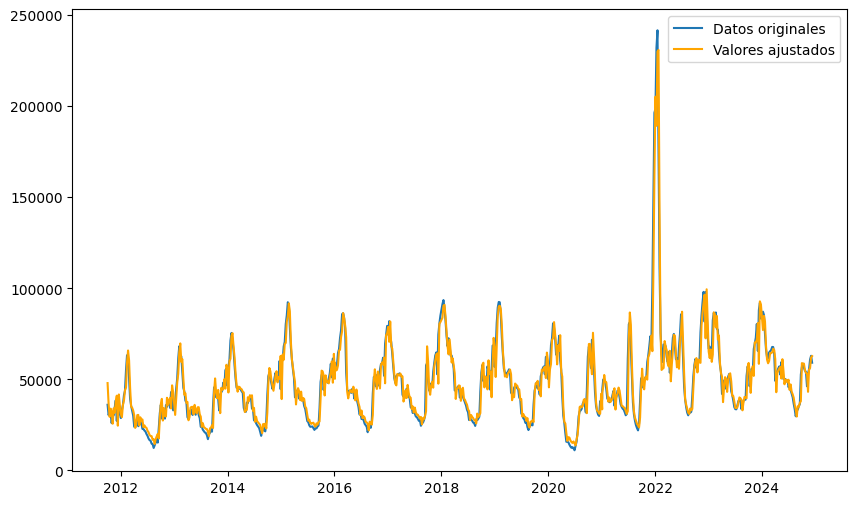

In [80]:

plt.figure(figsize=(10, 6))
plt.plot(df, label="Datos originales")
plt.plot(fitted_model.fittedvalues, label="Valores ajustados", color="orange")
plt.legend()
plt.show()

